# Stock Analysis and Stock Prediction

Analysis of Stock using prices, volume, moving average, returns, risk reward and comparison.

Using LSTM, model is built to do a closing price prediction.

Also live testing by entering a ticker.

### Imports

In [39]:
import warnings
warnings.simplefilter(action="ignore")

In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# For time stamps
from datetime import datetime

# Dataset

In [41]:
# Using yfinance package
# The tech stocks we'll use for this analysis
tech_list = ['AMD', 'NVDA', 'INTC', 'TSM']

# Set up End and Start times for data grab
tech_list = ['AMD', 'NVDA', 'INTC', 'TSM']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AMD, NVDA, INTC, TSM]
company_name = ['AMD', 'NVIDIA', 'INTEL', 'TSMC']
tickers = yf.Tickers('AMD NVDA INTC TSM')
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-08-17,107.620003,107.849998,104.099998,104.440002,104.440002,59064300,AMD
2023-08-18,102.400002,106.070000,101.680000,105.449997,105.449997,59884300,AMD
2023-08-21,106.199997,108.540001,105.669998,108.220001,108.220001,49319200,AMD
2023-08-22,109.400002,109.720001,104.849998,105.660004,105.660004,47335100,AMD
2023-08-23,105.650002,110.080002,105.000000,109.430000,109.430000,54656300,AMD
...,...,...,...,...,...,...,...
2024-08-12,166.000000,169.529999,165.539993,167.630005,167.630005,14727300,TSMC
2024-08-13,168.000000,172.449997,166.339996,172.339996,172.339996,15243500,TSMC
2024-08-14,171.880005,172.509995,167.190002,169.970001,169.970001,11510300,TSMC


# Descriptive Statistics

In [42]:
AMD.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,145.409722,148.160913,142.470674,145.351389,145.351389,6.050045e+07
std,29.738028,30.290081,28.832970,29.537485,29.537485,2.219415e+07
min,95.800003,97.040001,93.120003,93.669998,93.669998,1.900100e+07
25%,118.112497,119.850000,116.377499,118.284998,118.284998,4.584495e+07
50%,150.579994,153.550003,147.220001,150.580002,150.580002,5.501395e+07
75%,167.980003,171.180000,164.179996,167.735001,167.735001,6.887850e+07
max,213.410004,227.300003,208.220001,211.380005,211.380005,1.398255e+08


In [43]:
AMD.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-08-17 to 2024-08-16
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


## Closing price

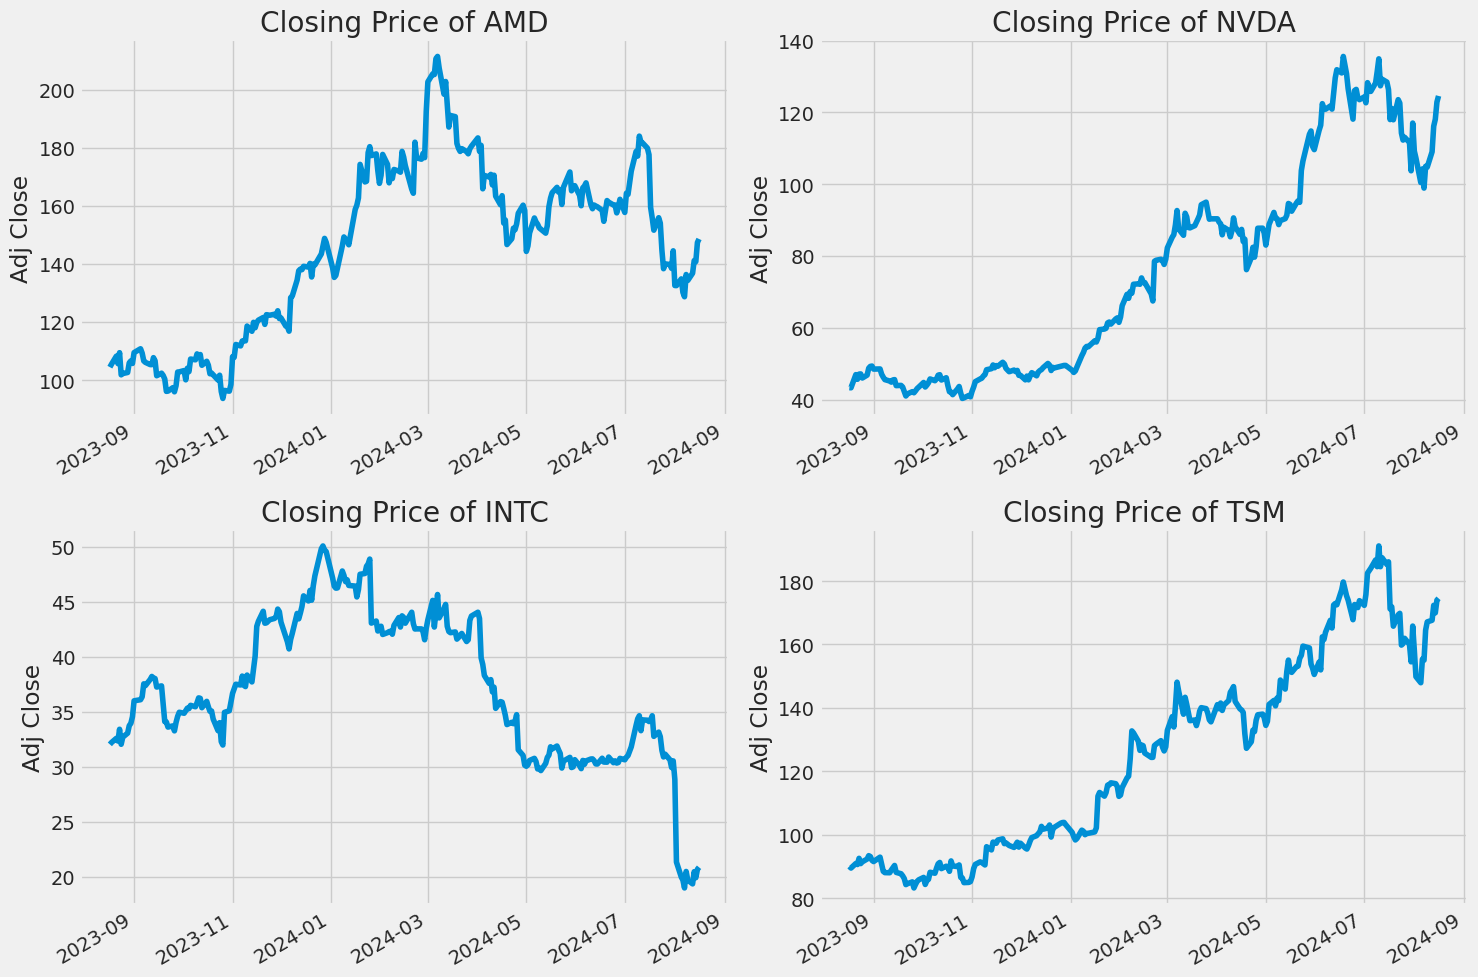

In [44]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=5, right=2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

## Sales Volume

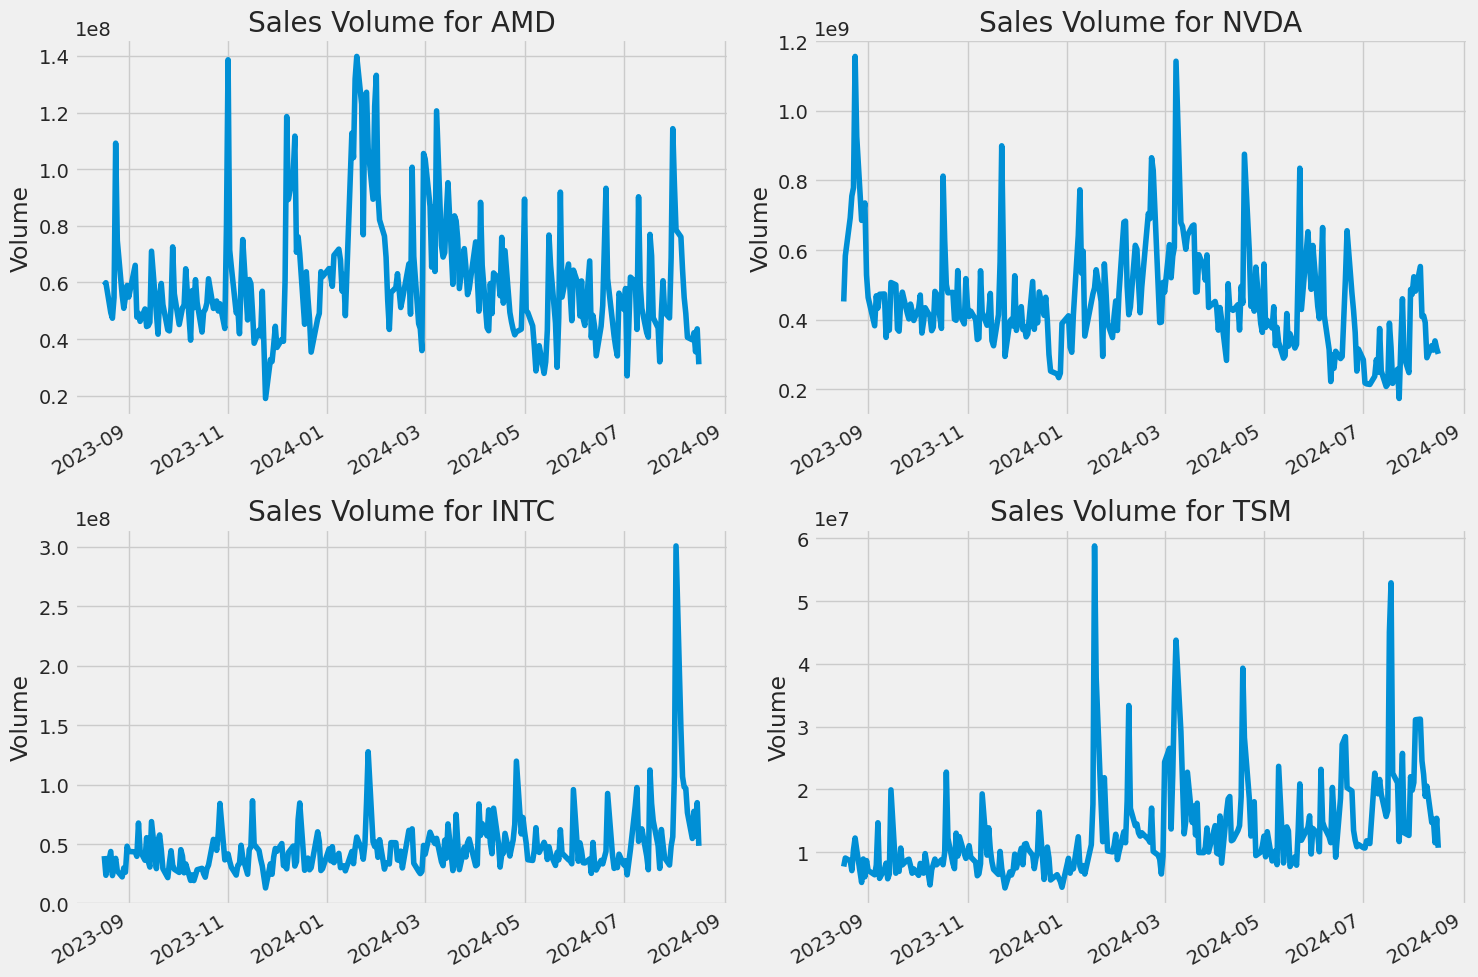

In [45]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

## Moving Average

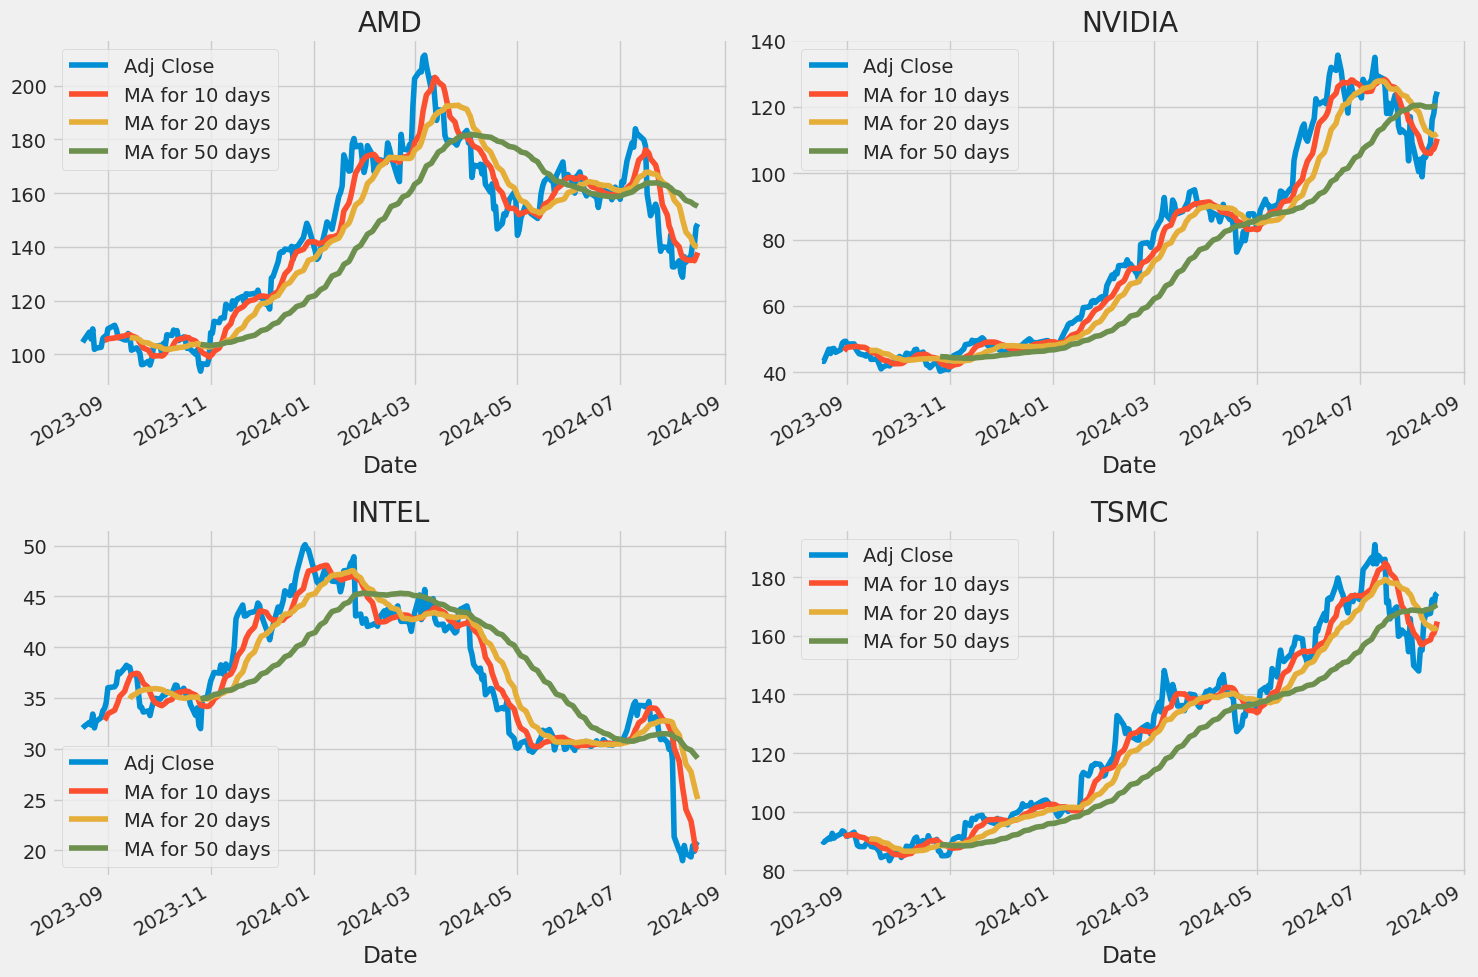

In [46]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AMD[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('AMD')

NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('NVIDIA')

INTC[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('INTEL')

TSM[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('TSMC')

fig.tight_layout()

## Daily Return

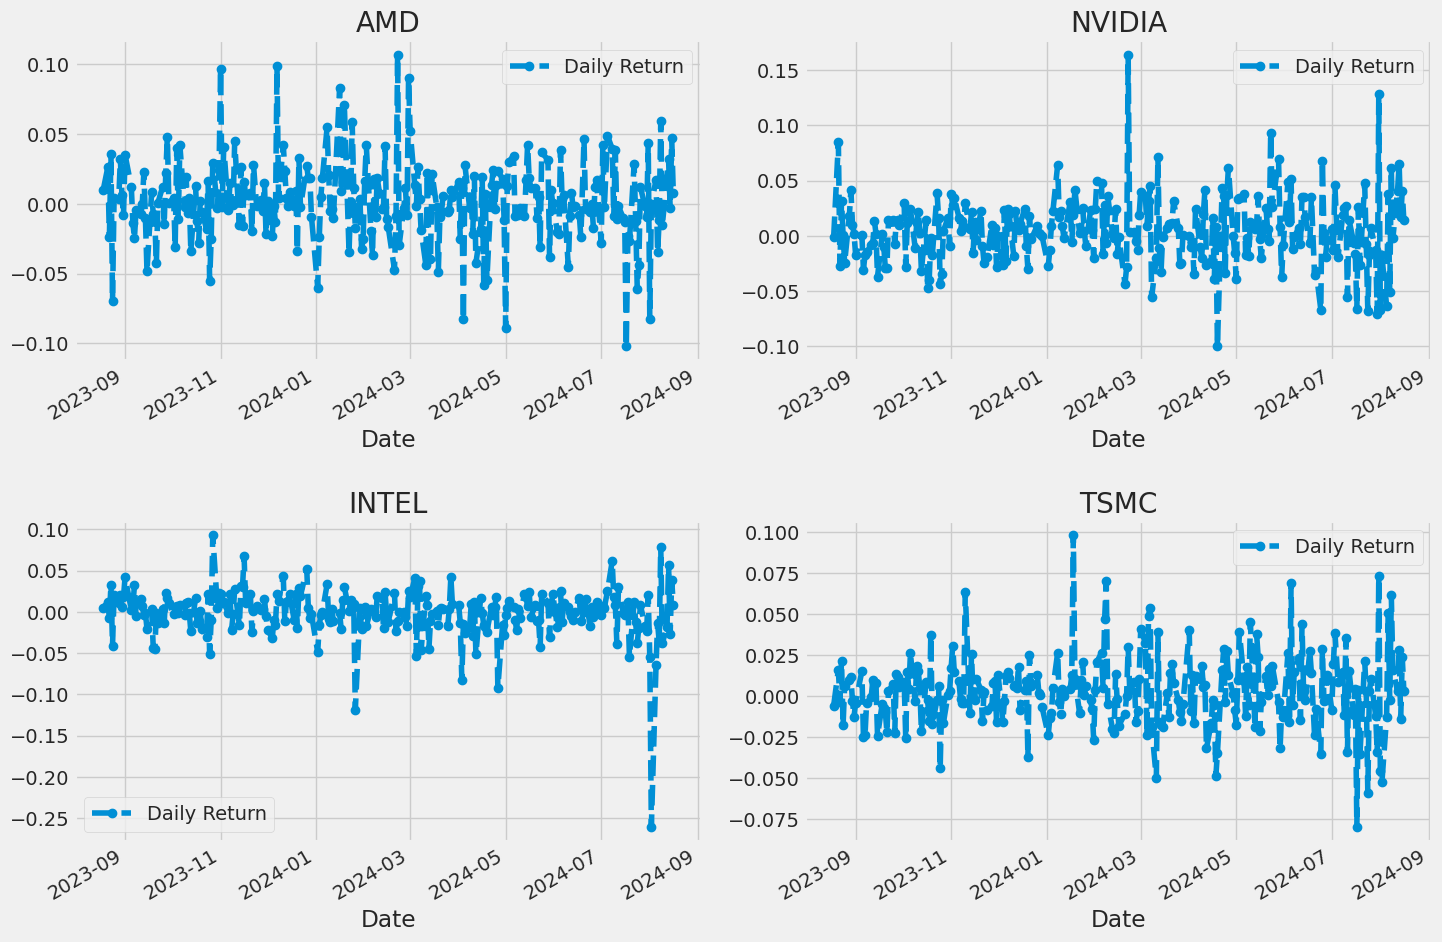

In [47]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AMD['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('AMD')

NVDA['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('NVIDIA')

INTC['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('INTEL')

TSM['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('TSMC')

fig.tight_layout(pad=2.0)
#plt.show()


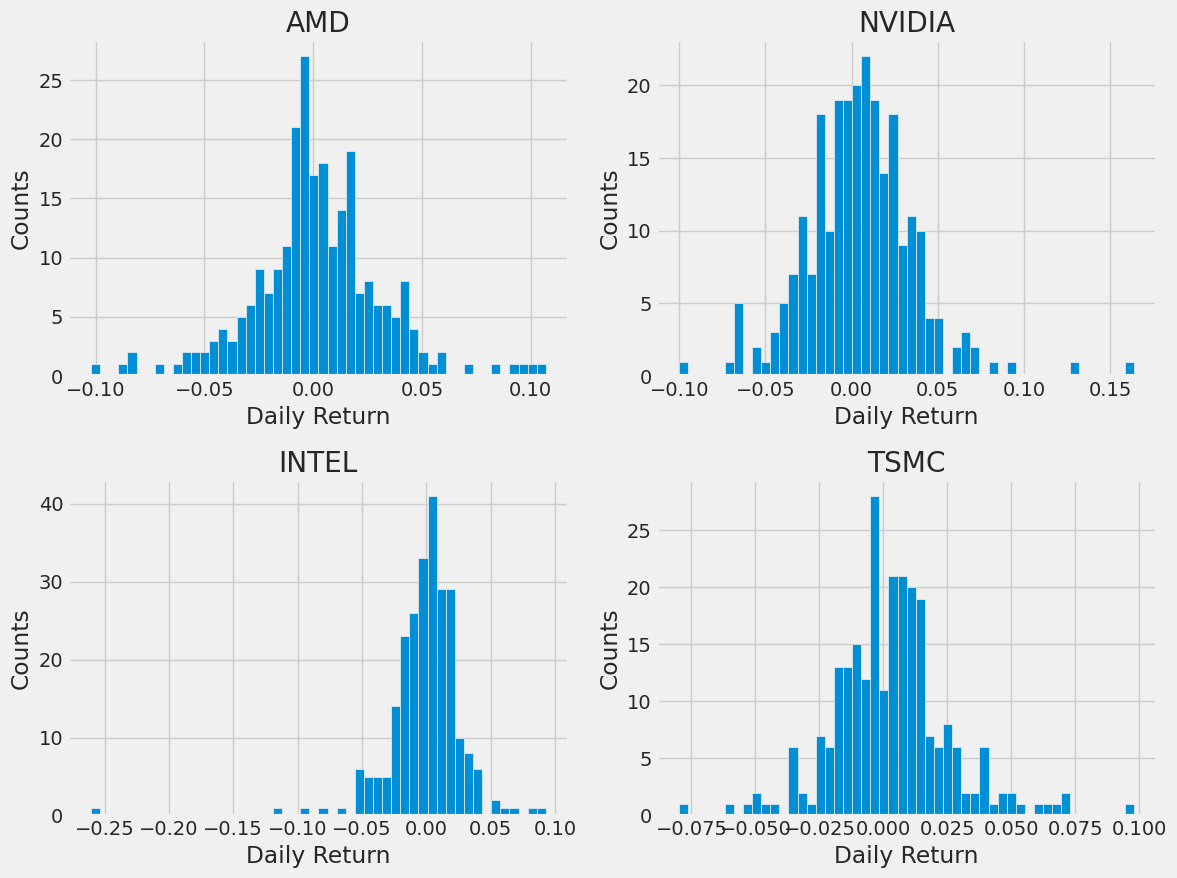

In [48]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.subplots_adjust(top=2.8, bottom= 1.6)
plt.tight_layout()


## Correlation - Closing Prices of Stocks

In [49]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets

[*********************100%%**********************]  4 of 4 completed


Ticker,AMD,INTC,NVDA,TSM
Date,,,,
2023-08-17,NaN,NaN,NaN,NaN
2023-08-18,0.009671,0.005218,-0.001038,-0.005893
2023-08-21,0.026268,0.011909,0.084713,0.016026
2023-08-22,-0.023655,-0.007544,-0.027658,-0.003457
2023-08-23,0.035680,0.033141,0.031707,0.021466
...,...,...,...,...
2024-08-12,0.018619,-0.017757,0.040764,0.003052
2024-08-13,0.031878,0.057335,0.065309,0.028098
2024-08-14,-0.002693,-0.026869,0.016704,-0.013752


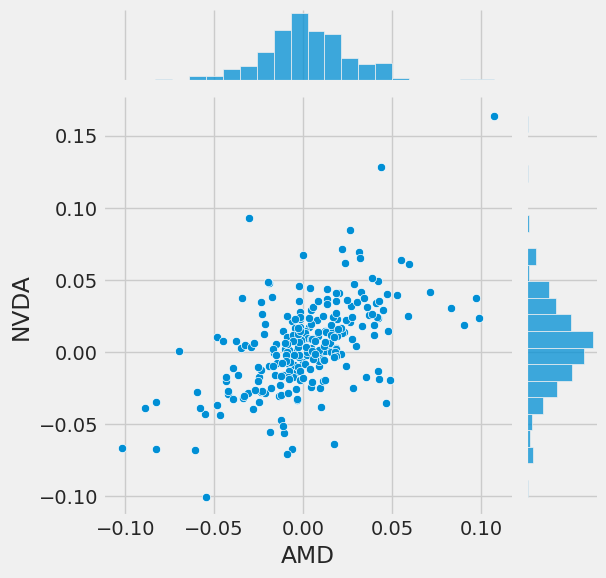

In [50]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='AMD', y='NVDA', data=tech_rets, kind='scatter')

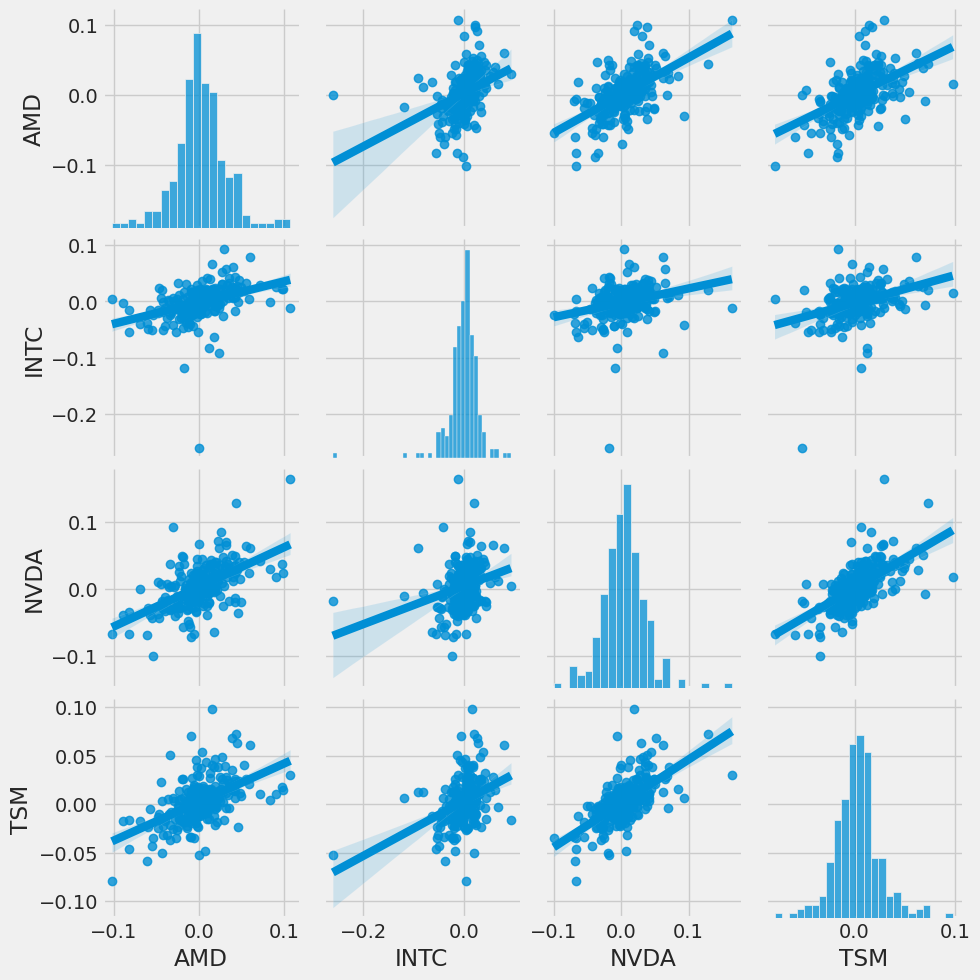

In [51]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

### Closing Difference

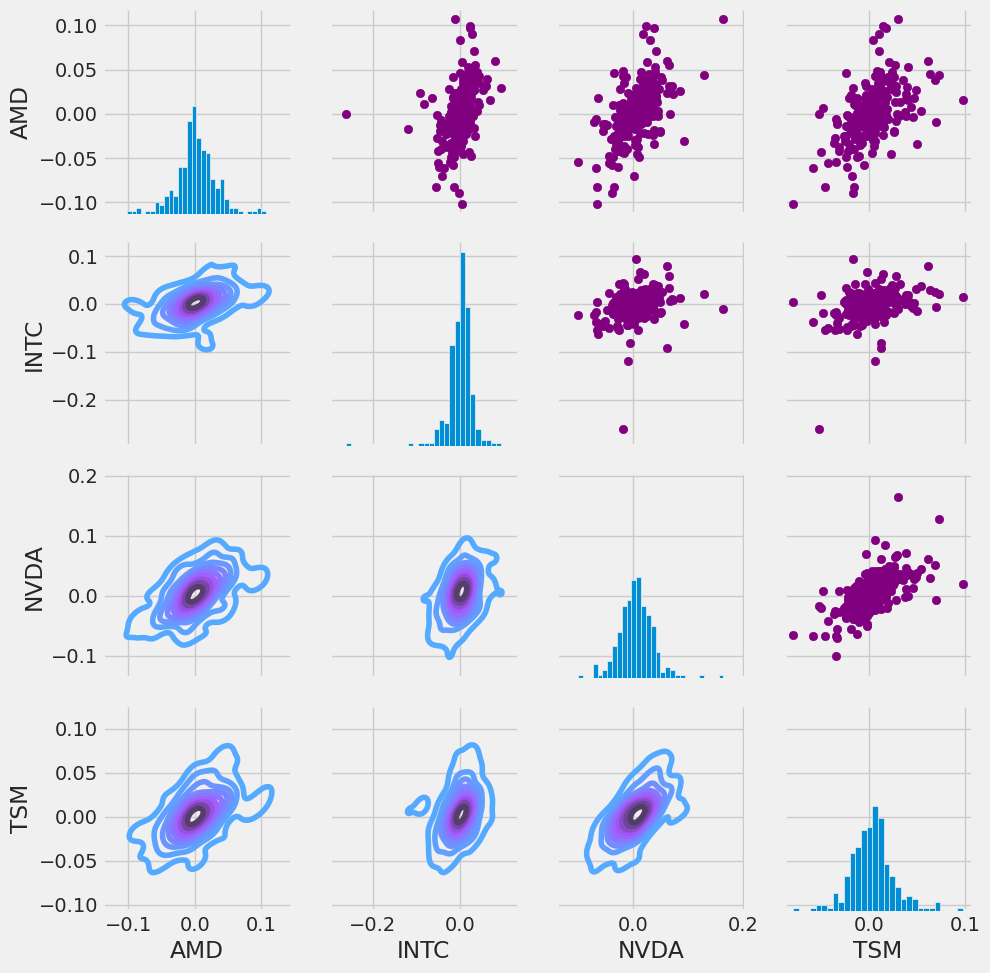

In [52]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

### Daily Returns

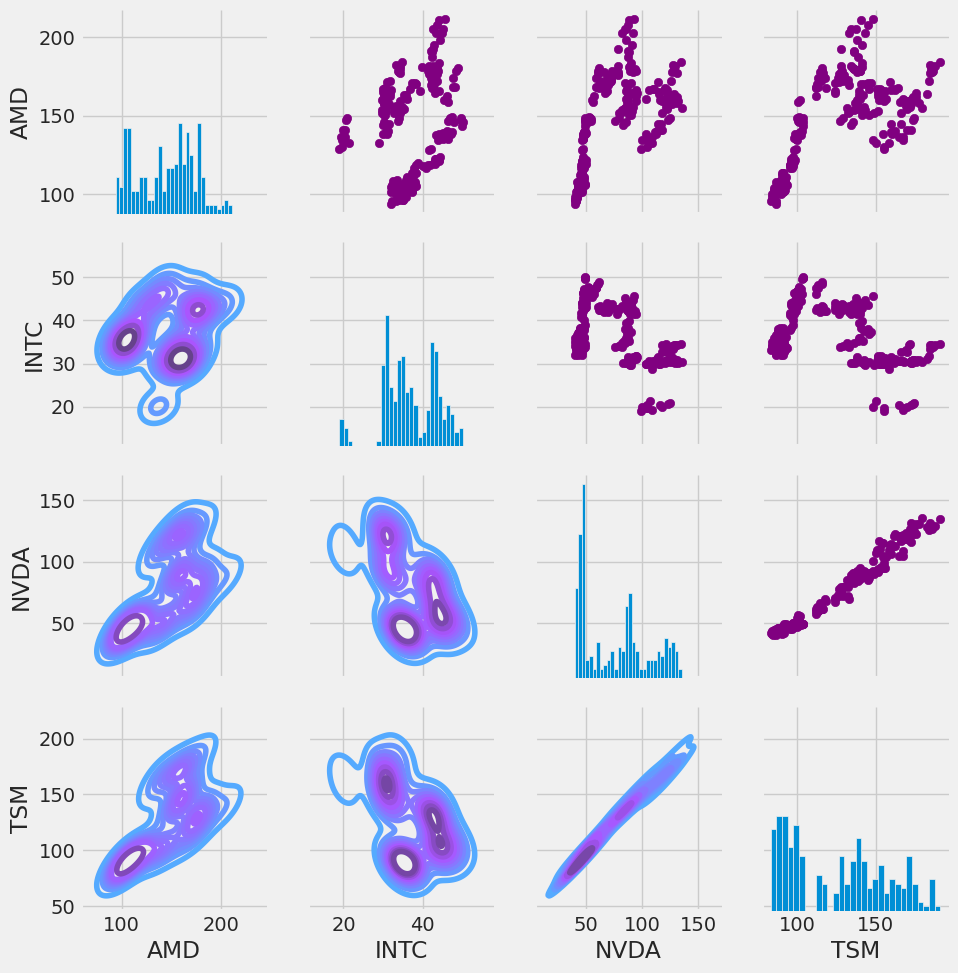

In [53]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

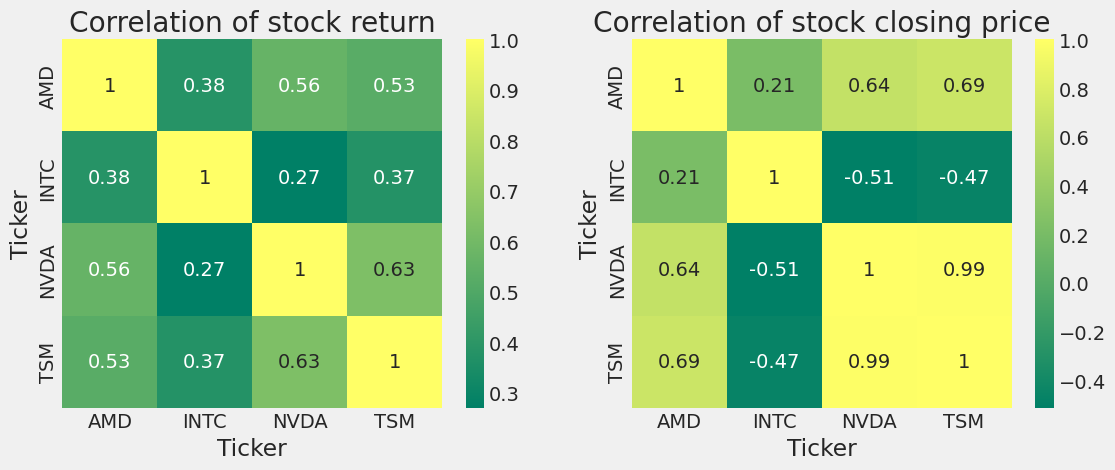

In [54]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

## Risk quantification
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

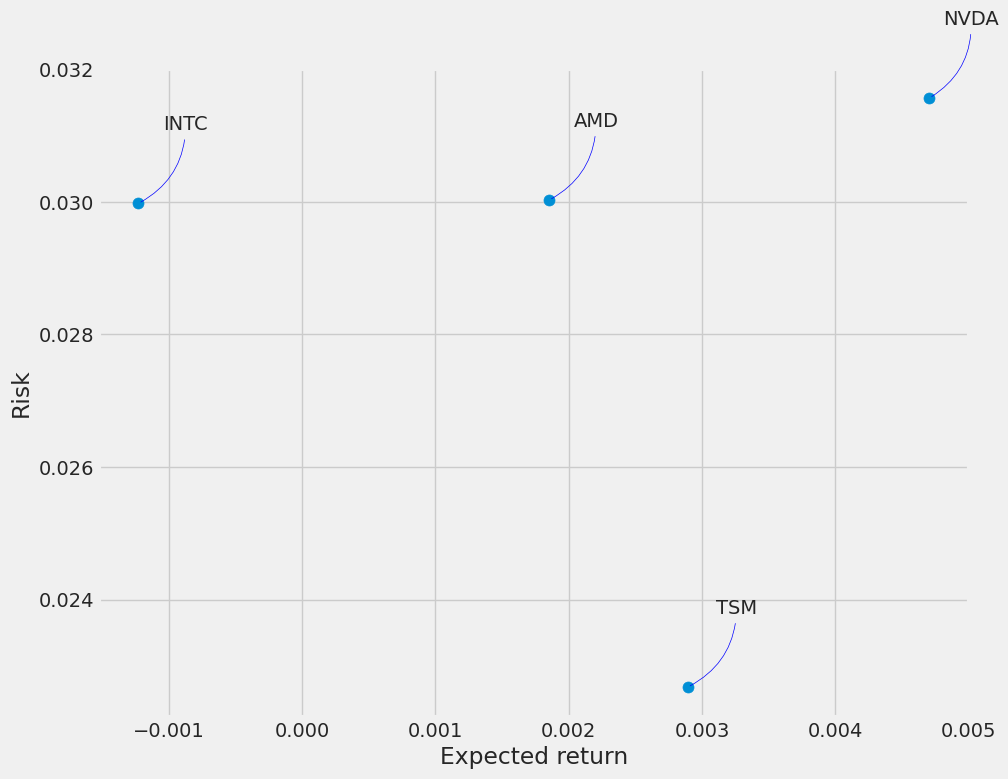

In [55]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Testing - Predict the closing price stock price of Intel Corporation

In [56]:
# Get the stock quote
df = yf.download('INTC', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,24.620001,24.889999,24.389999,24.540001,16.959806,44845600
2012-01-04,24.570000,25.129999,24.530001,25.110001,17.353737,47504000
2012-01-05,25.059999,25.450001,24.980000,25.400000,17.554157,49490600
2012-01-06,25.209999,25.400000,25.010000,25.250000,17.450489,36343500
2012-01-09,25.400000,25.559999,25.219999,25.469999,17.602533,47478600
...,...,...,...,...,...,...
2024-08-12,19.870001,19.969999,19.000000,19.360001,19.360001,54677600
2024-08-13,19.480000,20.480000,19.469999,20.469999,20.469999,77511300
2024-08-14,20.490000,20.500000,19.790001,19.920000,19.920000,56758200


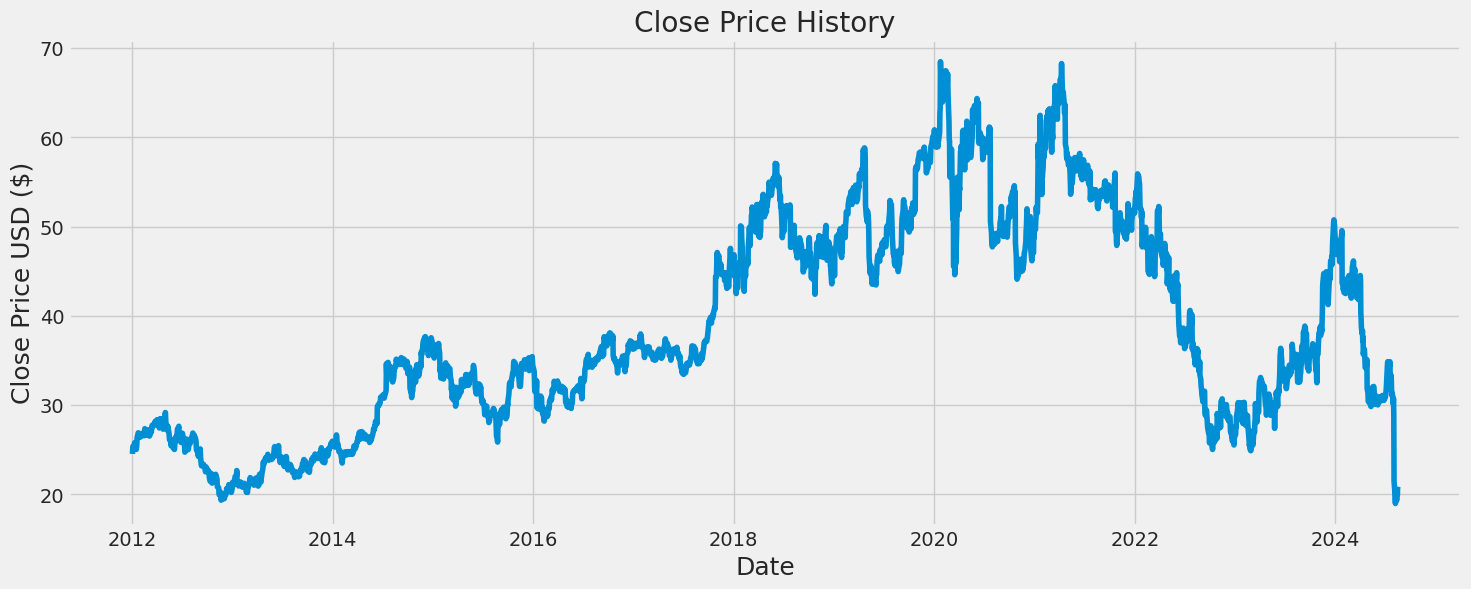

In [57]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [58]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3018

In [59]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.11216655],
       [0.12368635],
       [0.12954728],
       ...,
       [0.01879548],
       [0.03435733],
       [0.03799517]])

In [60]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.11216655, 0.12368635, 0.12954728, 0.12651576, 0.13096199,
       0.13338723, 0.13763135, 0.13662086, 0.12429263, 0.12227164,
       0.12934518, 0.13419562, 0.14935326, 0.15602262, 0.15986256,
       0.15986256, 0.15683104, 0.15642683, 0.15662894, 0.15016168,
       0.15278899, 0.15157639, 0.15662894, 0.15622472, 0.15460791,
       0.15885207, 0.15905418, 0.15582055, 0.15582055, 0.15743736,
       0.15339531, 0.15844786, 0.16936137, 0.16511722, 0.15642683,
       0.15501212, 0.15582055, 0.15966046, 0.16673403, 0.15945835,
       0.15905418, 0.16026678, 0.15258692, 0.15400163, 0.16006467,
       0.15864996, 0.1632983 , 0.16168148, 0.17178658, 0.17118026,
       0.17704123, 0.17663702, 0.17683912, 0.17704123, 0.17764755,
       0.18007275, 0.17966854, 0.18593372, 0.18593372, 0.17805172])]
[0.1853274011246187]

[array([0.11216655, 0.12368635, 0.12954728, 0.12651576, 0.13096199,
       0.13338723, 0.13763135, 0.13662086, 0.12429263, 0.12227164,
       0.12934518, 0.13419562, 0.149

In [61]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2958/2958 ━━━━━━━━━━━━━━━━━━━━ 167s 56ms/step - loss: 0.0028


In [62]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step


1.4060968193897925

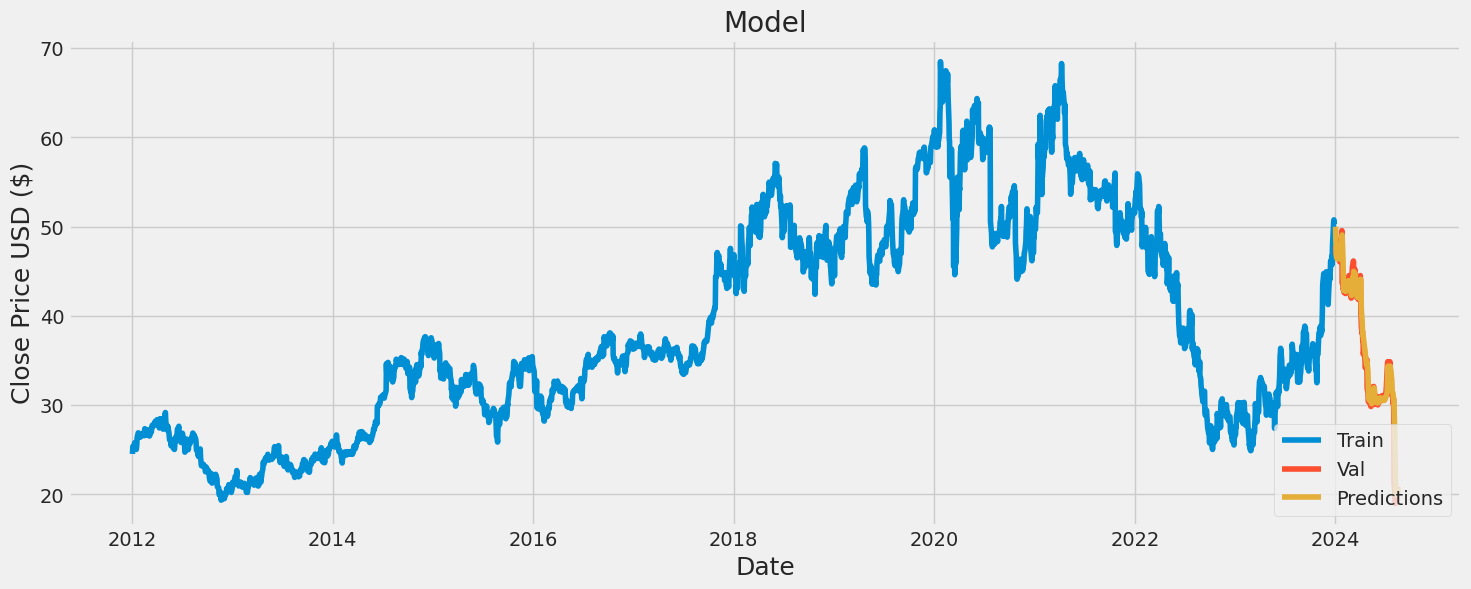

In [63]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [64]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2024-01-02,47.799999,49.983028
2024-01-03,47.049999,48.639183
2024-01-04,46.869999,47.348907
2024-01-05,46.889999,46.609676
2024-01-08,48.450001,46.381870
...,...,...
2024-08-12,19.360001,20.152943
2024-08-13,20.469999,20.101637
2024-08-14,19.920000,20.434666


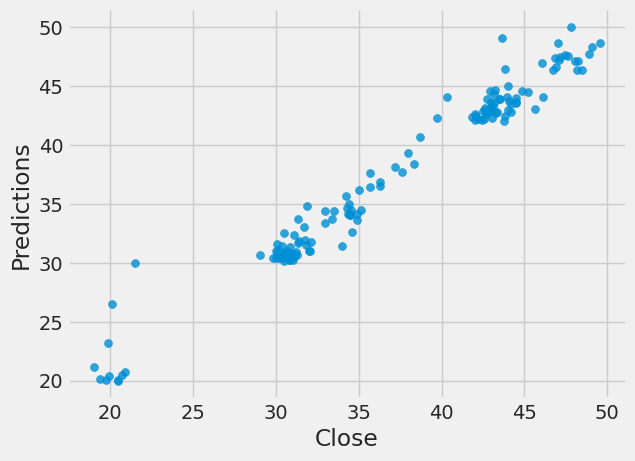

In [65]:
from matplotlib import pyplot as plt
valid.plot(kind='scatter', x='Close', y='Predictions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Enter a Ticker: See prediction


Enter Ticker of the Stock: MSFT


[*********************100%%**********************]  1 of 1 completed


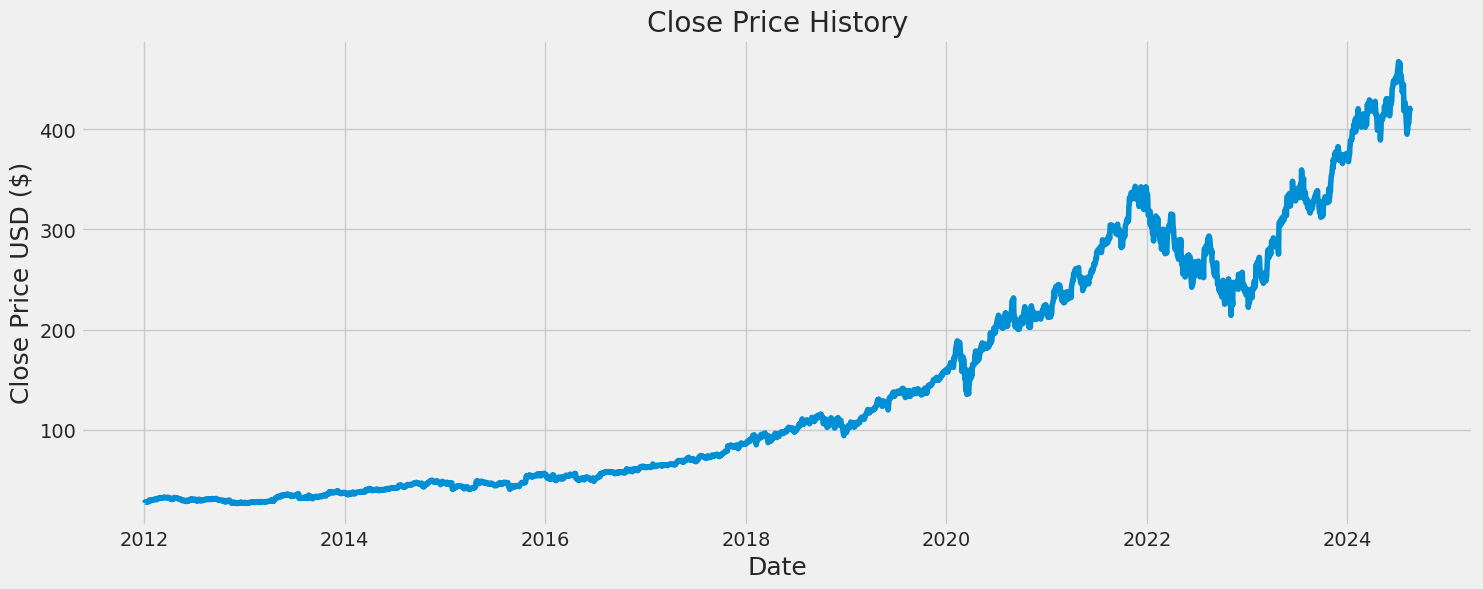

2958/2958 ━━━━━━━━━━━━━━━━━━━━ 171s 57ms/step - loss: 0.0015
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step
8.139598718978432


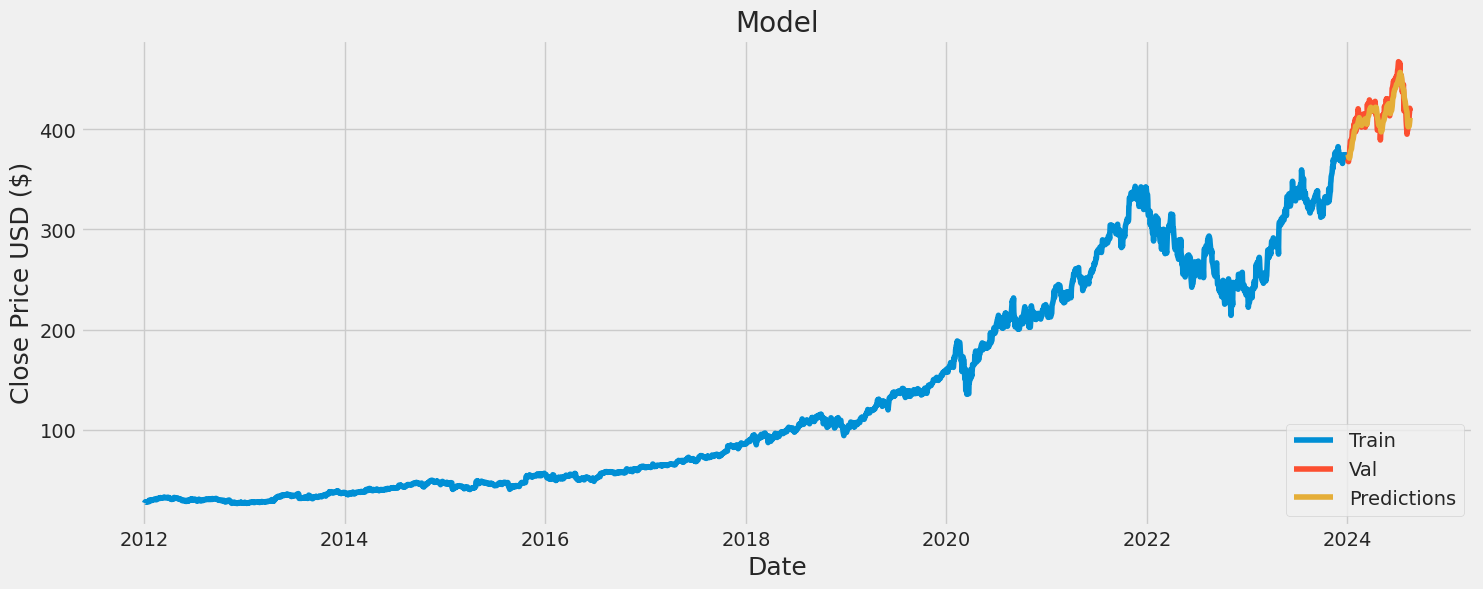

                 Close  Predictions
Date                               
2024-01-02  370.869995   375.106506
2024-01-03  370.600006   374.578796
2024-01-04  367.940002   373.751526
2024-01-05  367.750000   372.477966
2024-01-08  374.690002   371.266052
...                ...          ...
2024-08-12  406.809998   402.674377
2024-08-13  414.010010   403.429199
2024-08-14  416.859985   405.609955
2024-08-15  421.029999   408.345428
2024-08-16  418.470001   411.481445

[158 rows x 2 columns]


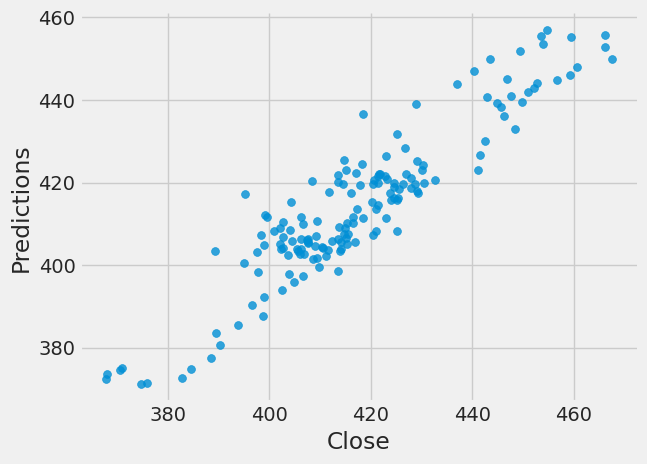

In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# For time stamps
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM

ticker = str(input("Enter Ticker of the Stock: "))

# Get the stock quote
df = yf.download(ticker, start='2012-01-01', end=datetime.now())

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))


scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

print(rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

print(valid)

valid.plot(kind='scatter', x='Close', y='Predictions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)